In [4]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Configuración
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("df_final.csv")
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work,iter_hourly_rate,iter_total_working_years,iter_monthly_income,iter_salary,knn_hourly_rate,knn_total_working_years,knn_monthly_income,knn_salary
0,51,no,NaN,2015.72,NaN,6,3,NaN,1,low,female,251.967241,high,executive,research_director,high,NaN,16280.830000,42330.17,7,no,13,"3,0",high,full_time,0,30.039744,5,good,20,15,15,1972,195370.000000,yes,83.042302,11.318934,16280.830000,195370.000000,83.042302,11.318934,16280.830000,195370.000000
1,52,no,NaN,2063.39,NaN,1,4,life_sciences,2,high,female,257.925812,medium,executive,manager,high,NaN,17117.127783,43331.17,0,no,14,"3,0",low,part_time,1,34.000000,5,good,33,11,9,1971,199990.000000,yes,83.042302,34.000000,5697.600227,199990.000000,83.042302,34.000000,5697.600227,199990.000000
2,42,no,travel_rarely,1984.25,research_&_development,4,2,technical_degree,3,high,female,248.033353,high,executive,manager,very_high,married,16468.252120,41669.33,1,no,11,"3,0",very_high,part_time,0,22.000000,3,good,22,11,15,1981,192320.000000,yes,83.042302,22.000000,5697.600227,192320.000000,83.042302,22.000000,5697.600227,192320.000000
3,47,no,travel_rarely,1771.40,NaN,2,4,medical,4,low,male,221.426998,high,manager,research_director,high,married,14307.500000,37199.50,3,no,19,"3,0",medium,full_time,2,26.672707,2,good,20,5,6,1976,171690.000000,no,83.042302,11.318934,14307.500000,171690.000000,83.042302,11.318934,14307.500000,171690.000000
4,46,no,NaN,1582.77,NaN,3,3,technical_degree,5,low,male,102.958162,very_high,manager,sales_executive,low,divorced,12783.920000,33238.20,2,no,12,"3,0",very_high,part_time,1,11.260715,5,good,19,2,8,1977,79832.804746,no,83.042302,11.318934,12783.920000,65245.875313,83.042302,11.318934,12783.920000,65245.875313


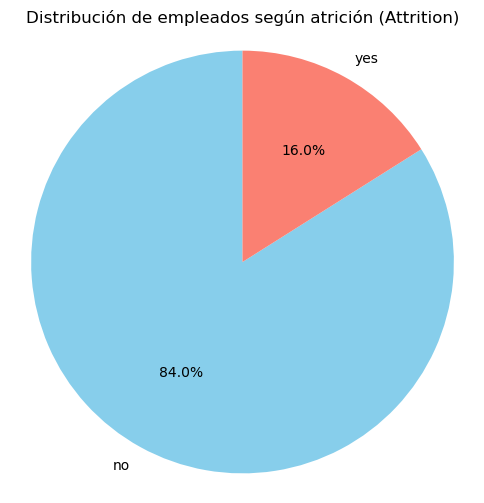

In [8]:
# 1. ¿Cómo se distribuye el abondono entre los empleados?
conteo=df['attrition'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribución de empleados según atrición (Attrition)") # cambié el nombre al de español y le dejé el de inglés entre paréntesis
plt.axis('equal')  
plt.show()

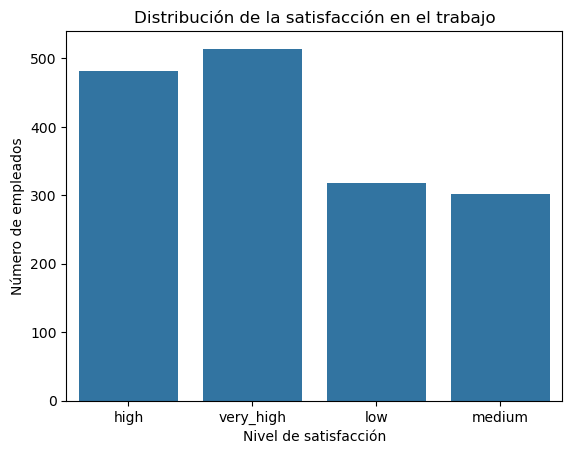

In [ ]:
# 2. Cómo se distribuye la satisfacción entre los empleados?
sns.countplot(data=df, x='job_satisfaction')
plt.title('Distribución de la satisfacción en el trabajo')
plt.xlabel('Nivel de satisfacción')
plt.ylabel('Número de empleados')
plt.show()

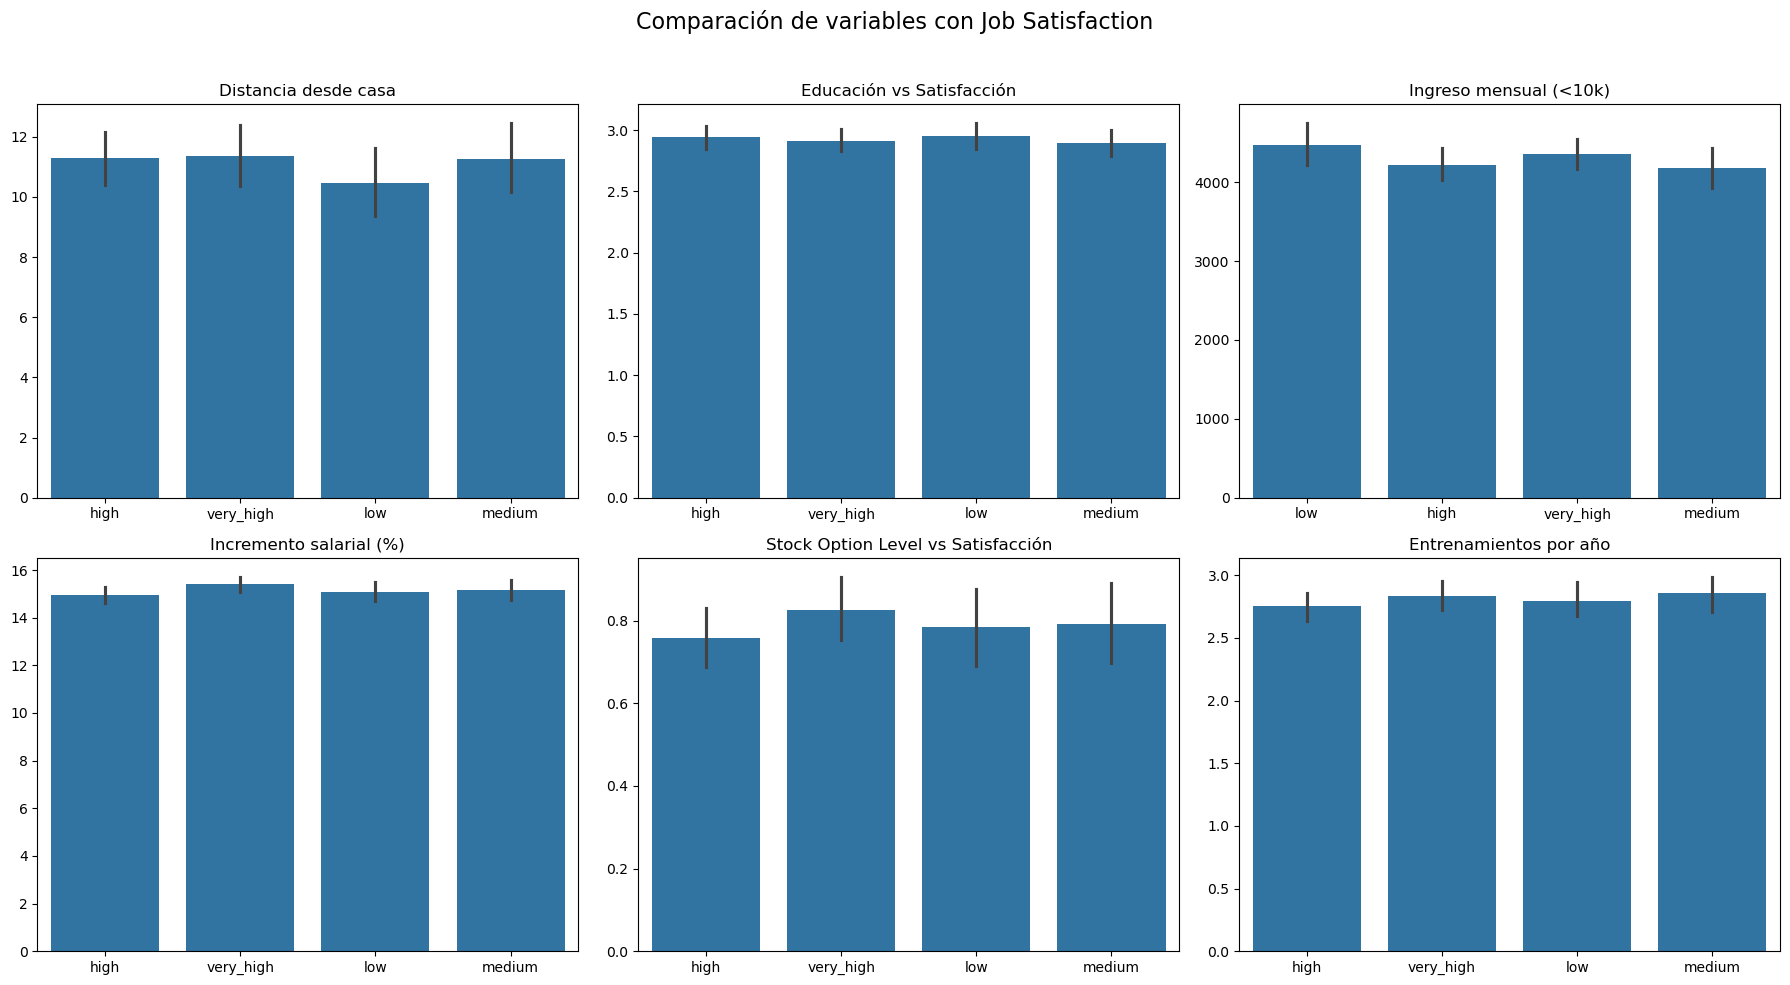

In [14]:
# Opcional: filtrar MonthlyIncome para evitar outliers extremos
df_filtered = df[df['monthly_income'] < 10000]
# df_filtered = df[df['attrition'] == 'yes']

# Crear figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Comparación de variables con Job Satisfaction', fontsize=16)

# 1. DistanceFromHome
sns.barplot(ax=axes[0, 0], data=df, x='job_satisfaction', y='distance_from_home')
axes[0, 0].set_title('Distancia desde casa')

# 2. Education
sns.barplot(ax=axes[0, 1], data=df, y='education', x='job_satisfaction')
axes[0, 1].set_title('Educación vs Satisfacción')

# 3. MonthlyIncome (filtrado)
sns.barplot(ax=axes[0, 2], data=df_filtered, x='job_satisfaction', y='monthly_income')
axes[0, 2].set_title('Ingreso mensual (<10k)')

# 4. PercentSalaryHike
sns.barplot(ax=axes[1, 0], data=df, x='job_satisfaction', y='percent_salary_hike')
axes[1, 0].set_title('Incremento salarial (%)')

# 5. StockOptionLevel
sns.barplot(ax=axes[1, 1], data=df, y='stock_option_level', x='job_satisfaction')
axes[1, 1].set_title('Stock Option Level vs Satisfacción')

# 6. TrainingTimesLastYear
sns.barplot(ax=axes[1, 2], data=df, y='training_times_last_year', x='job_satisfaction')
axes[1, 2].set_title('Entrenamientos por año')

# Ajustes generales
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

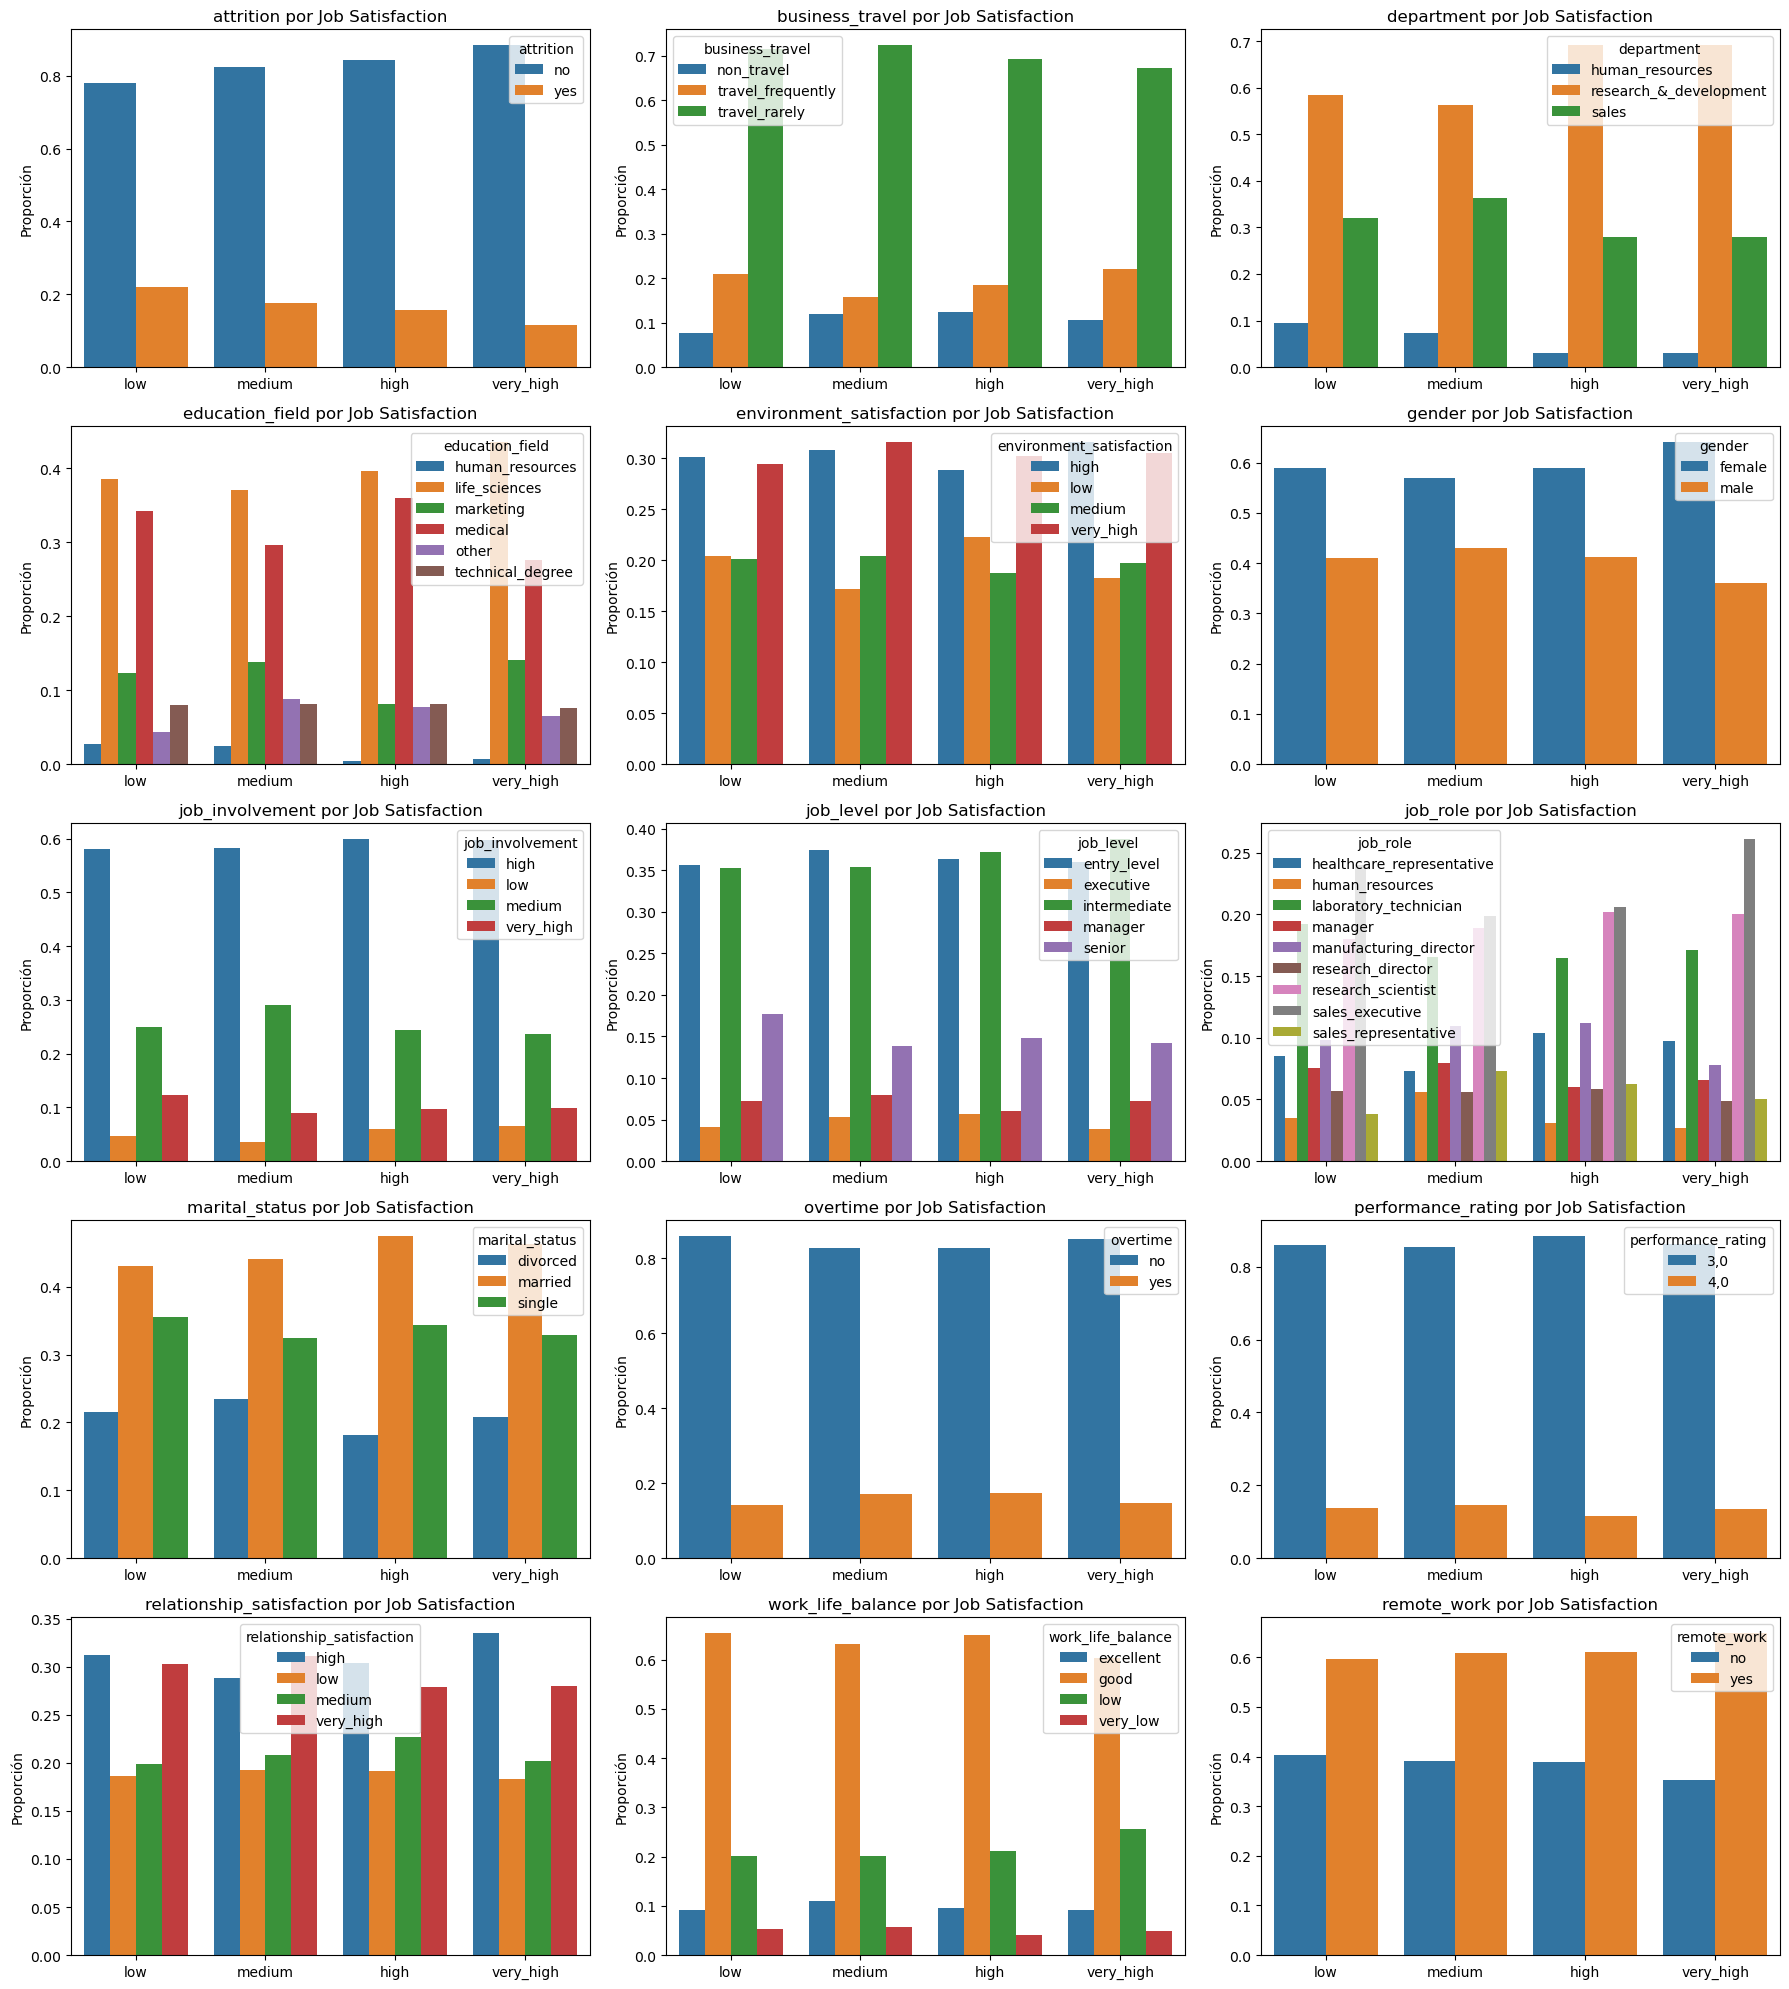

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir el orden correcto de los niveles de satisfacción
orden_satisfaccion = ['low', 'medium', 'high', 'very_high']

# Convertir la columna en categórica ordenada
df['job_satisfaction'] = df['job_satisfaction'].str.strip().str.lower()  # Por si acaso
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=orden_satisfaccion, ordered=True)

# Lista de columnas a comparar con 'job_satisfaction'
cols = [
    'attrition', 'business_travel', 'department', 'education_field',
    'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
    'job_role', 'marital_status', 'overtime', 'performance_rating',
    'relationship_satisfaction', 'work_life_balance', 'remote_work'
]

# Número de gráficos por fila
ncols = 3
nrows = -(-len(cols) // ncols)

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

# Crear visualizaciones con barplot
for i, col in enumerate(cols):
    ax = axes[i]
    try:
        # Si es categórica → % distribución por nivel de satisfacción
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            # Calcular proporciones por grupo de satisfacción
            prop_df = df.groupby(['job_satisfaction', col]).size().reset_index(name='count')
            total_per_group = prop_df.groupby('job_satisfaction')['count'].transform('sum')
            prop_df['percentage'] = prop_df['count'] / total_per_group

            sns.barplot(
                data=prop_df,
                x='job_satisfaction',
                y='percentage',
                hue=col,
                ax=ax,
                order=orden_satisfaccion  # Asegura el orden correcto
            )
            ax.set_ylabel('Proporción')
            ax.set_title(f'{col} por Job Satisfaction')

        else:
            # Si es numérica → media por grupo de satisfacción
            sns.barplot(
                data=df,
                x='job_satisfaction',
                y=col,
                ax=ax,
                estimator='mean',
                order=orden_satisfaccion
            )
            ax.set_ylabel(f'Media de {col}')
            ax.set_title(f'Media de {col} por Job Satisfaction')

        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=0)
    except Exception as e:
        ax.set_visible(False)
        print(f'Error al graficar {col}: {e}')

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


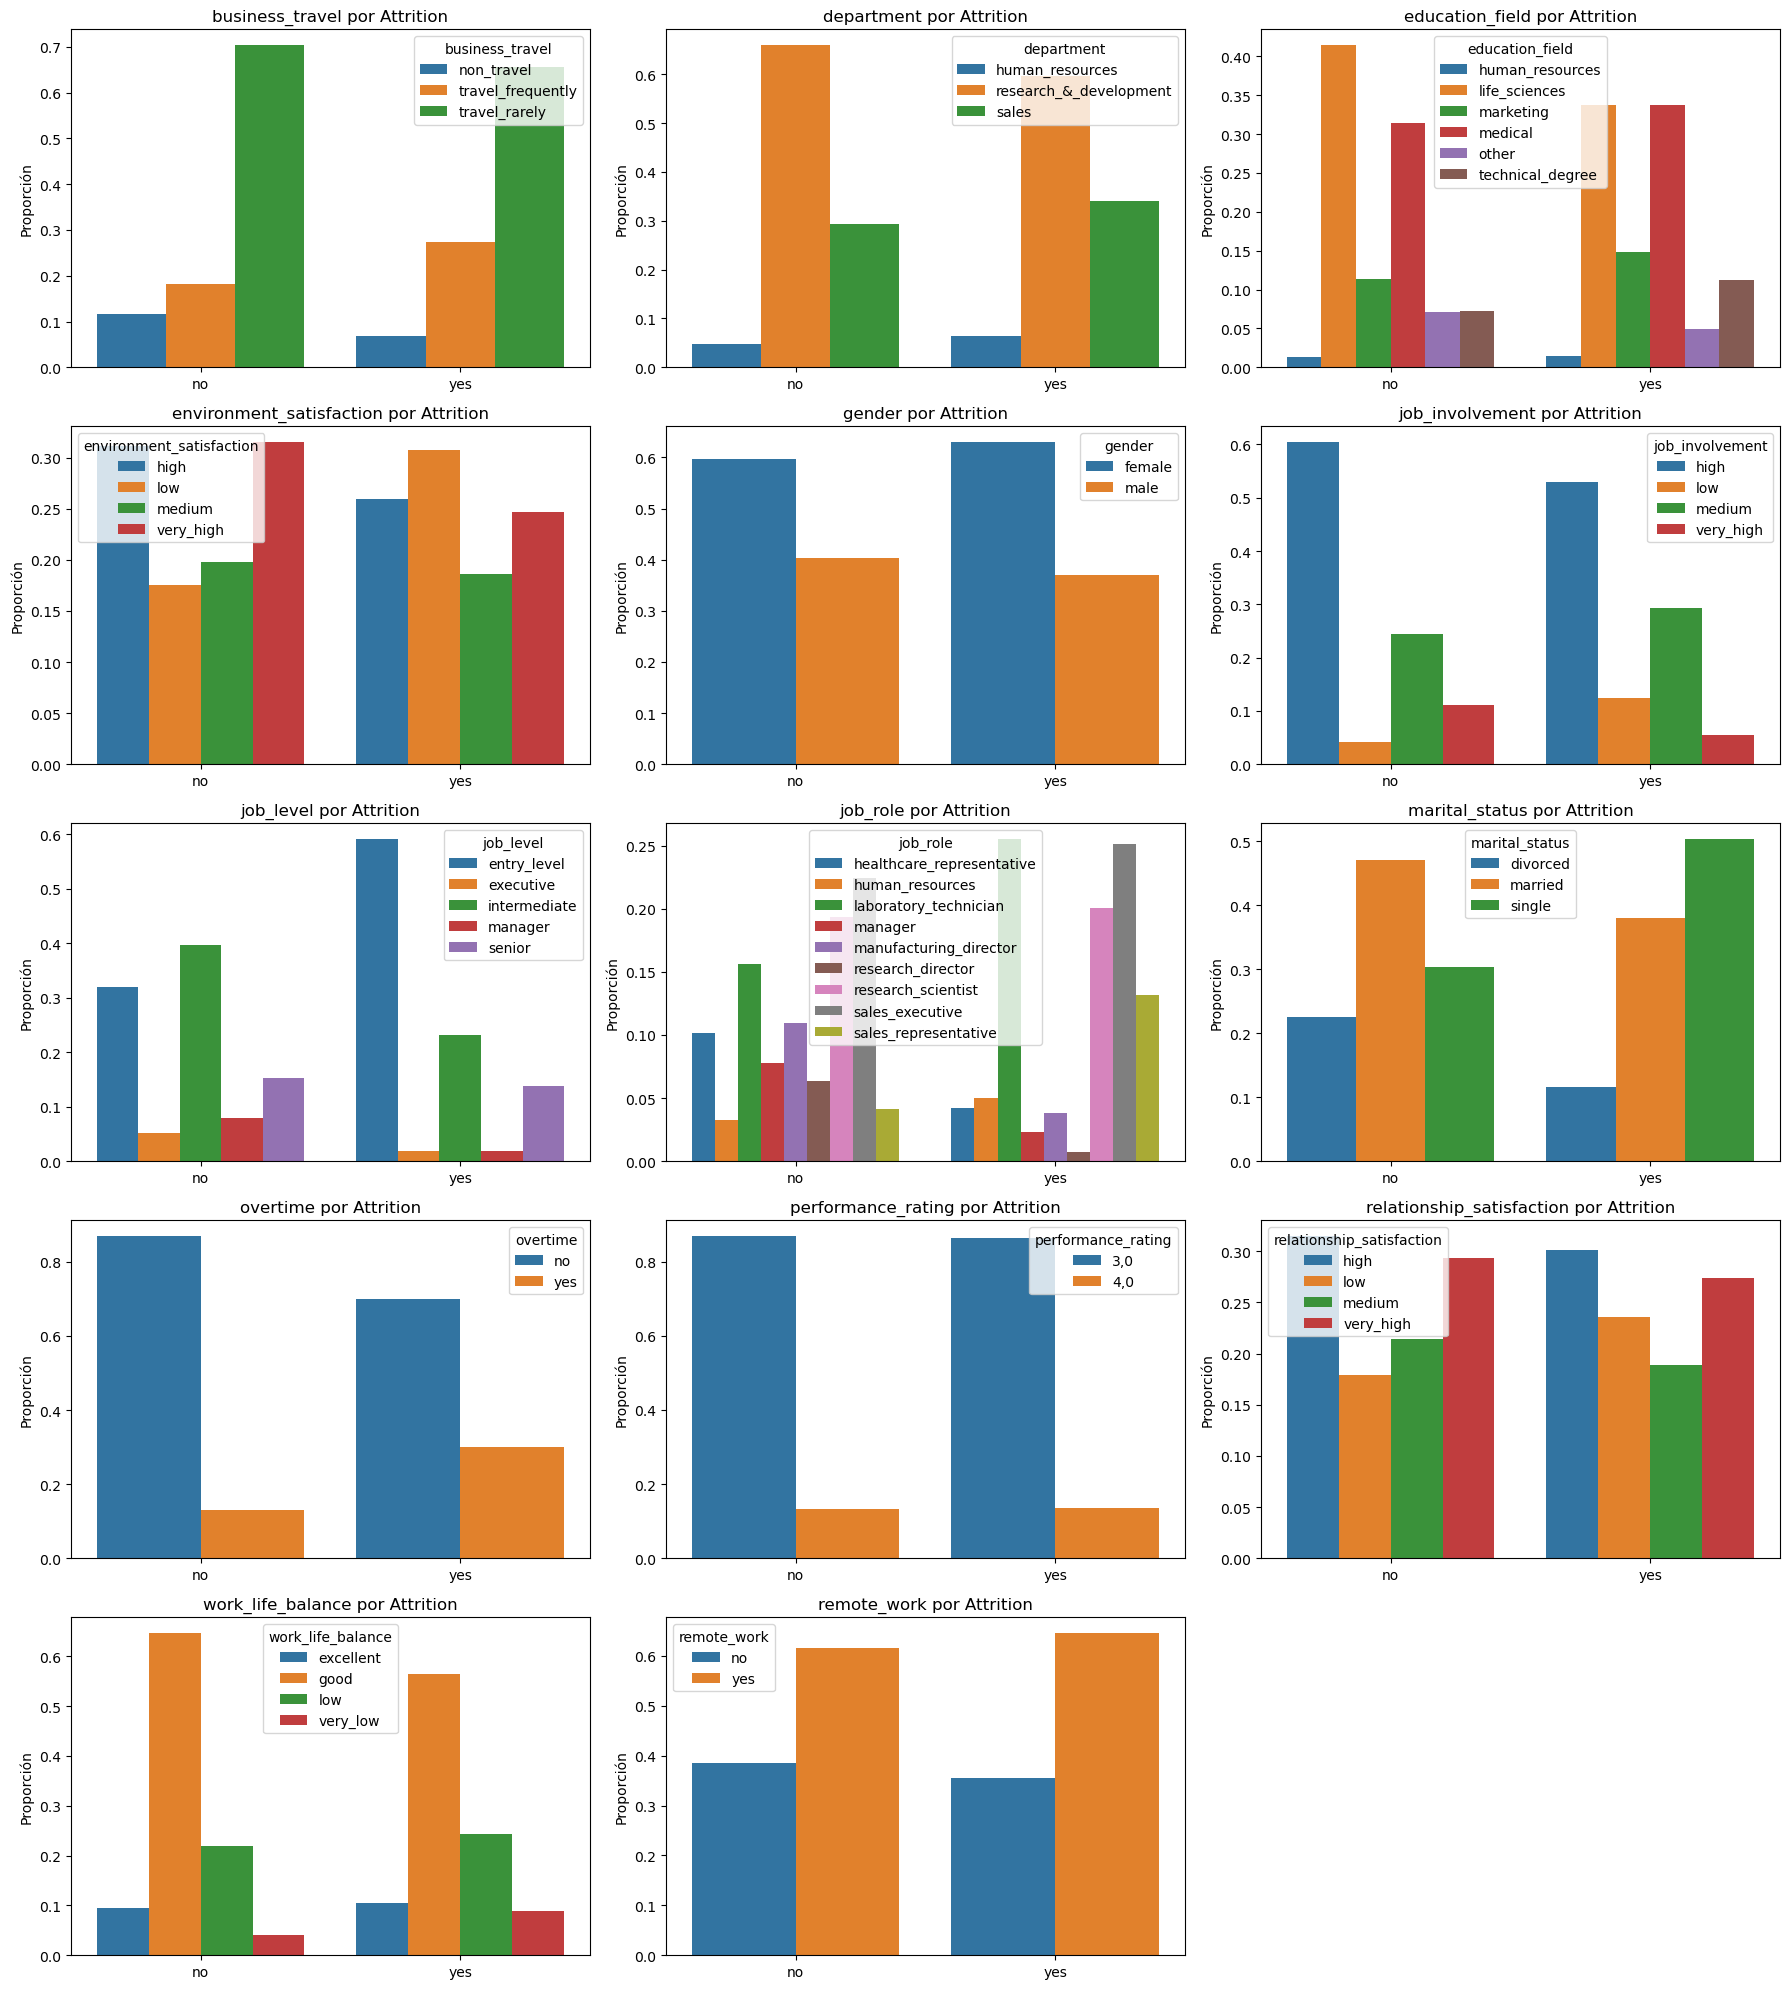

In [17]:
# Lista de columnas a comparar con 'attrition'
cols = [
    'business_travel', 'department', 'education_field',
    'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
    'job_role', 'marital_status', 'overtime', 'performance_rating',
    'relationship_satisfaction', 'work_life_balance', 'remote_work'
]

# Número de gráficos por fila
ncols = 3
nrows = -(-len(cols) // ncols)  # redondeo hacia arriba

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

# Crear visualizaciones
for i, col in enumerate(cols):
    ax = axes[i]
    try:
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            # Categórica: proporciones por attrition
            prop_df = df.groupby(['attrition', col]).size().reset_index(name='count')
            total_per_group = prop_df.groupby('attrition')['count'].transform('sum')
            prop_df['percentage'] = prop_df['count'] / total_per_group

            sns.barplot(data=prop_df, x='attrition', y='percentage', hue=col, ax=ax)
            ax.set_ylabel('Proporción')
            ax.set_title(f'{col} por Attrition')

        else:
            # Numérica: media por attrition
            sns.barplot(data=df, x='attrition', y=col, ax=ax, estimator='mean')
            ax.set_ylabel(f'Media de {col}')
            ax.set_title(f'Media de {col} por Attrition')

        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=0)

    except Exception as e:
        ax.set_visible(False)
        print(f'Error al graficar {col}: {e}')

# Ocultar subplots sobrantes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()